In [1]:
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

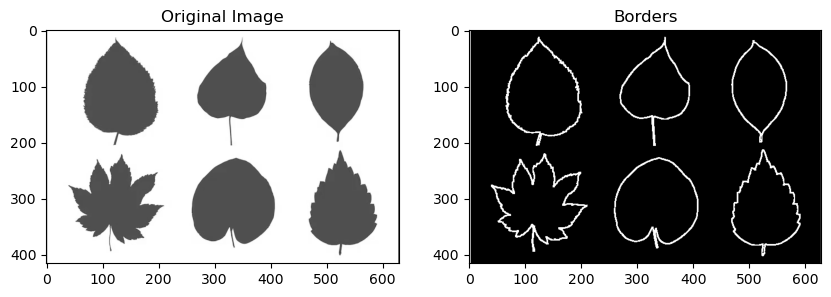

In [5]:
def create_graph_from_image(image):
    rows, cols = image.shape
    G = nx.Graph()

    for r in range(rows):
        for c in range(cols):
            G.add_node((r, c), intensity=image[r, c])
            if r > 0:
                G.add_edge((r, c), (r-1, c), weight=abs(int(image[r, c]) - int(image[r-1, c])))
            if c > 0:
                G.add_edge((r, c), (r, c-1), weight=abs(int(image[r, c]) - int(image[r, c-1])))
            if r > 0 and c > 0:
                G.add_edge((r, c), (r-1, c-1), weight=abs(int(image[r, c]) - int(image[r-1, c-1])))
            if r > 0 and c < cols-1:
                G.add_edge((r, c), (r-1, c+1), weight=abs(int(image[r, c]) - int(image[r-1, c+1])))
    return G

def find_borders(G, threshold=30):
    edges = []
    for (u, v, d) in G.edges(data=True):
        if d['weight'] > threshold:
            edges.append((u, v))
    return edges

def draw_borders(image, edges):
    for (u, v) in edges:
        image[u] = 255
        image[v] = 255
    return image

# Load and preprocess the image
image_path = 'imagens_teste/folhas.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#image = cv2.resize(image, (100, 100))  # Resize for simplicity

# Create the graph from the image
G = create_graph_from_image(image)

# Find the borders based on edge weights
edges = find_borders(G)

# Draw the borders on a blank image
border_image = np.zeros_like(image)
border_image = draw_borders(border_image, edges)

# Display the original and border images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Borders')
plt.imshow(border_image, cmap='gray')
plt.show()
